<a href="https://colab.research.google.com/github/Jobmrtall/Heart-attack-analysis-and-visualization/blob/main/Heart_attack_data_analysis_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

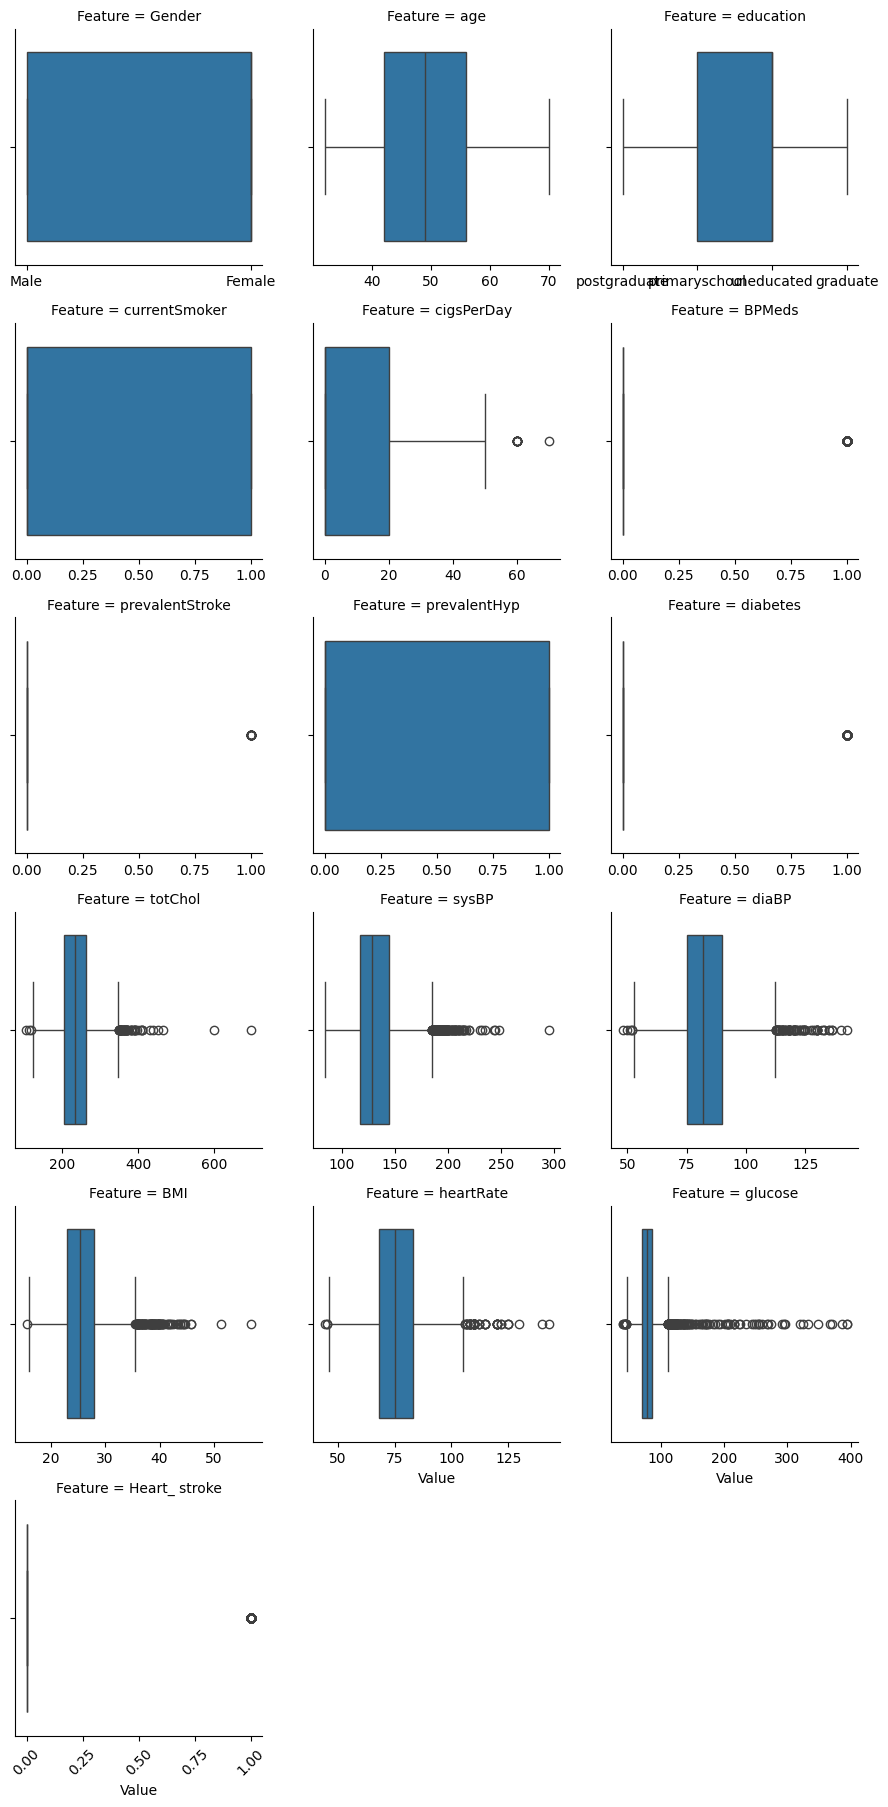

,0
Gender,0
age,0
education,101
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

hd=pd.read_csv('https://raw.githubusercontent.com/Jobmrtall/MSD/refs/heads/main/heart_disease.csv')
hd.isna().sum()
hd['Heart_ stroke']=hd['Heart_ stroke'].map({'yes':1,'No':0})
hd['prevalentStroke']=hd['prevalentStroke'].map({'yes':1,'no':0})

hd.head()
l=hd.select_dtypes('float')
hd_melted = hd.melt(value_vars=hd, var_name='Feature', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(hd_melted, col='Feature', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'Value')

# Adjust layout
plt.xticks(rotation=45)
plt.show()
threshold=len(hd)*0.05
col_to_drop=hd.columns[hd.isna().sum()<=threshold]
col_to_drop=col_to_drop.drop('education')
hd=hd.dropna(subset=col_to_drop)
hd.isna().sum()

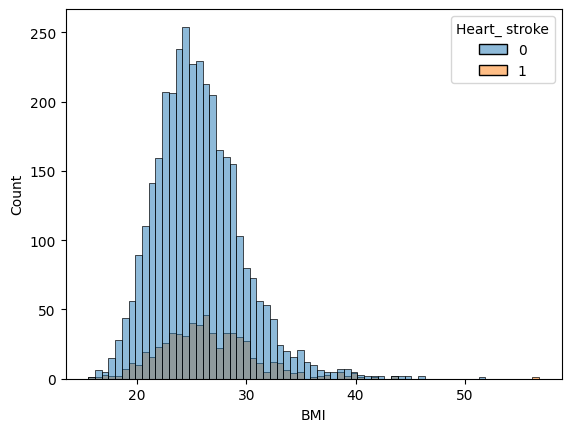

In [ ]:
sns.histplot(x='BMI',hue='Heart_ stroke',data=hd)
plt.show()

In [ ]:
h=hd.groupby('diabetes')['glucose'].median().to_dict()
hd['glucose']=hd['glucose'].fillna(hd['diabetes'].map(h))
hd.isna().sum()

,0
Gender,0
age,0
education,101
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
hd.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,49.504403,0.490215,8.992417,0.029354,0.005382,0.309198,0.025440,236.682241,132.224193,82.888209,25.798889,75.836106,81.594423,0.149462
std,8.541411,0.499965,11.910941,0.168818,0.073171,0.462219,0.157478,44.466740,21.906447,11.839921,4.077910,12.064789,22.945108,0.356587
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,83.000000,85.000000,0.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Compute IQR-based lower and upper bounds
hd['age']=hd['age'].astype('float')
hd['BPMeds']=hd['BPMeds'].astype('int')
hdf=hd.select_dtypes(include=['float']).columns
Q1 = hd[hdf].quantile(0.25)
Q3 = hd[hdf].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values to IQR range
hd[hdf] = hd[hdf].clip(lower=lower_bound, upper=upper_bound, axis=1)



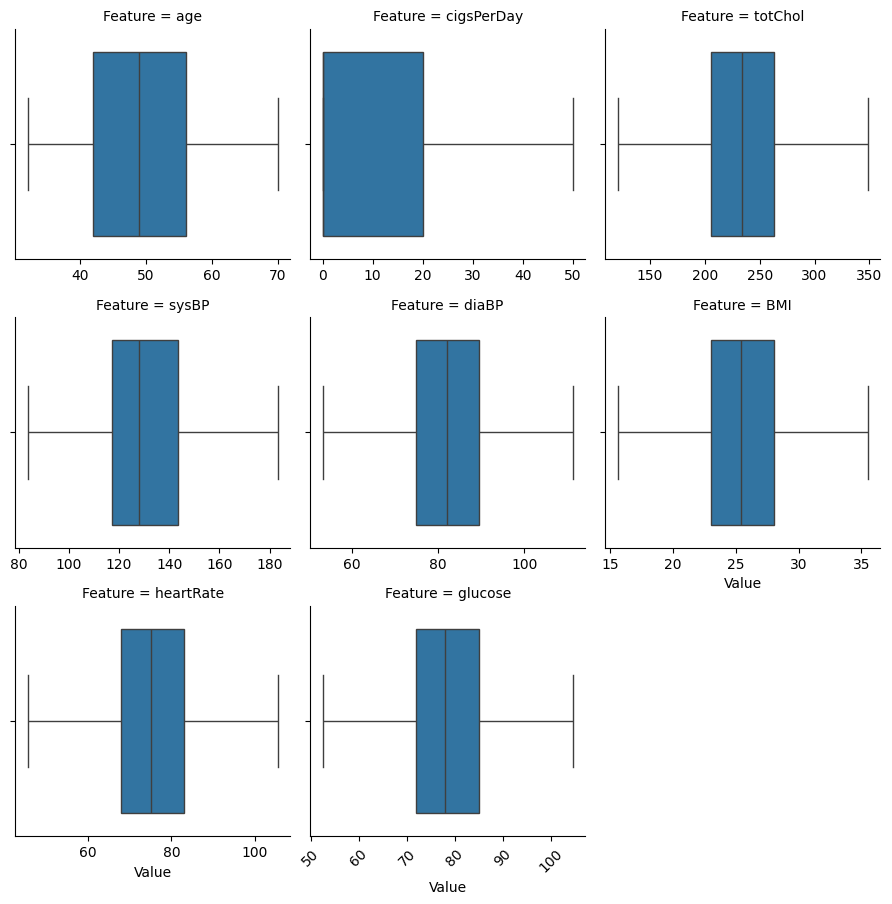

In [ ]:
# Reshape data to long format for FacetGrid
hd_melted = hd.melt(value_vars=hdf, var_name='Feature', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(hd_melted, col='Feature', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'Value')

# Adjust layout
plt.xticks(rotation=45)
plt.show()

In [ ]:
def categorize_bmi(bmi):
  if bmi <18.5:
    return 'underweight'
  elif bmi>=18.5 and bmi<=24.9:
    return 'normal'
  elif bmi<=29.9:
    return 'overweight'
  else:
    return 'obese'
hd['BMI_Status']=hd['BMI'].apply(categorize_bmi)
hd.head()
(hd['heartRate']>100).value_counts()

,count
heartRate,
False,3985
True,103


In [ ]:
hd['age']=hd['age'].astype('float')
hd['BPMeds']=hd['BPMeds'].astype('int')

In [ ]:
b=hd.select_dtypes(include='int64')
c=hd.select_dtypes(include='float')

c['Heart_ stroke']=hd['Heart_ stroke']
c

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...
4232,68.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,50.0,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51.0,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,78.0,0


Binary-Binary Variables

df.corr() treats binary variables as continuous (0 and 1) and calculates Pearson correlation.
This may not be accurate because binary variables should use the Phi coefficient or Chi-square test instead.
Binary-Continuous Variables

Pearson correlation may still work, but the correct method is the Point-Biserial correlation, which accounts for binary groups.
Continuous-Continuous Variables

df.corr() works fine here using Pearson correlation.

In [ ]:
hd.isna().sum()

,0
Gender,0
age,0
education,101
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
(hd['BPMeds']==1).sum()

120

In [ ]:
hd.info()
b.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4088 non-null   object 
 1   age              4088 non-null   float64
 2   education        3987 non-null   object 
 3   currentSmoker    4088 non-null   int64  
 4   cigsPerDay       4088 non-null   float64
 5   BPMeds           4088 non-null   int64  
 6   prevalentStroke  4088 non-null   int64  
 7   prevalentHyp     4088 non-null   int64  
 8   diabetes         4088 non-null   int64  
 9   totChol          4088 non-null   float64
 10  sysBP            4088 non-null   float64
 11  diaBP            4088 non-null   float64
 12  BMI              4088 non-null   float64
 13  heartRate        4088 non-null   float64
 14  glucose          4088 non-null   float64
 15  Heart_ stroke    4088 non-null   int64  
 16  BMI_Status       4088 non-null   object 
dtypes: float64(8), int6

,0
currentSmoker,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
Heart_ stroke,0


In [ ]:
from scipy.stats import pointbiserialr, pearsonr, spearmanr
from scipy.stats import chi2_contingency
def mixed_corr_matrix(df):
    cols = df.columns
    corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(i, len(cols)):  # Compute only upper triangle
            var1, var2 = df[cols[i]], df[cols[j]]

            if var1.nunique() == 2 and var2.nunique() == 2:  # Binary-Binary
                table = pd.crosstab(var1, var2).values
                chi2, _, _, _ = chi2_contingency(table)
                phi = np.sqrt(chi2 / len(var1))
                corr_matrix.iloc[i, j] = corr_matrix.iloc[j, i] = phi

            elif var1.nunique() == 2 or var2.nunique() == 2:  # Binary-Continuous
                r_pb, _ = pointbiserialr(var1, var2)
                corr_matrix.iloc[i, j] = corr_matrix.iloc[j, i] = r_pb

            else:  # Continuous-Continuous
                pearson_corr, _ = pearsonr(var1, var2)
                corr_matrix.iloc[i, j] = corr_matrix.iloc[j, i] = pearson_corr

    return corr_matrix

# Compute mixed correlation matrix
corr_matrix_b = mixed_corr_matrix(b)

corr_matrix_c=mixed_corr_matrix(c)

In [ ]:
corr_matrix_b

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Heart_ stroke
currentSmoker,0.999511,0.047327,0.028658,0.101783,0.041899,0.024674
BPMeds,0.047327,0.995707,0.115960,0.258366,0.050134,0.083586
prevalentStroke,0.028658,0.115960,0.977150,0.062923,0.000000,0.039497
prevalentHyp,0.101783,0.258366,0.062923,0.999427,0.075107,0.173064
diabetes,0.041899,0.050134,0.000000,0.075107,0.995067,0.086953
Heart_ stroke,0.024674,0.083586,0.039497,0.173064,0.086953,0.999038


In [ ]:
corr_matrix_c

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
age,1.000000,-0.192253,0.271817,0.393354,0.204009,0.136224,-0.013302,0.117392,0.226849
cigsPerDay,-0.192253,1.000000,-0.027095,-0.085532,-0.050015,-0.090218,0.074850,-0.075701,0.063699
totChol,0.271817,-0.027095,1.000000,0.216783,0.179119,0.137248,0.087399,0.035464,0.077421
sysBP,0.393354,-0.085532,0.216783,1.000000,0.782405,0.322661,0.181961,0.121716,0.208260
diaBP,0.204009,-0.050015,0.179119,0.782405,1.000000,0.375495,0.179472,0.055714,0.141075
BMI,0.136224,-0.090218,0.137248,0.322661,0.375495,1.000000,0.064082,0.085174,0.073937
heartRate,-0.013302,0.074850,0.087399,0.181961,0.179472,0.064082,1.000000,0.102054,0.025700
glucose,0.117392,-0.075701,0.035464,0.121716,0.055714,0.085174,0.102054,1.000000,0.064057
Heart_ stroke,0.226849,0.063699,0.077421,0.208260,0.141075,0.073937,0.025700,0.064057,0.999038


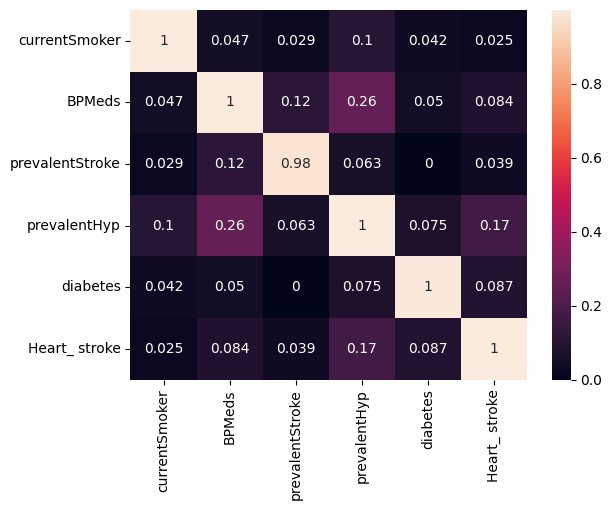

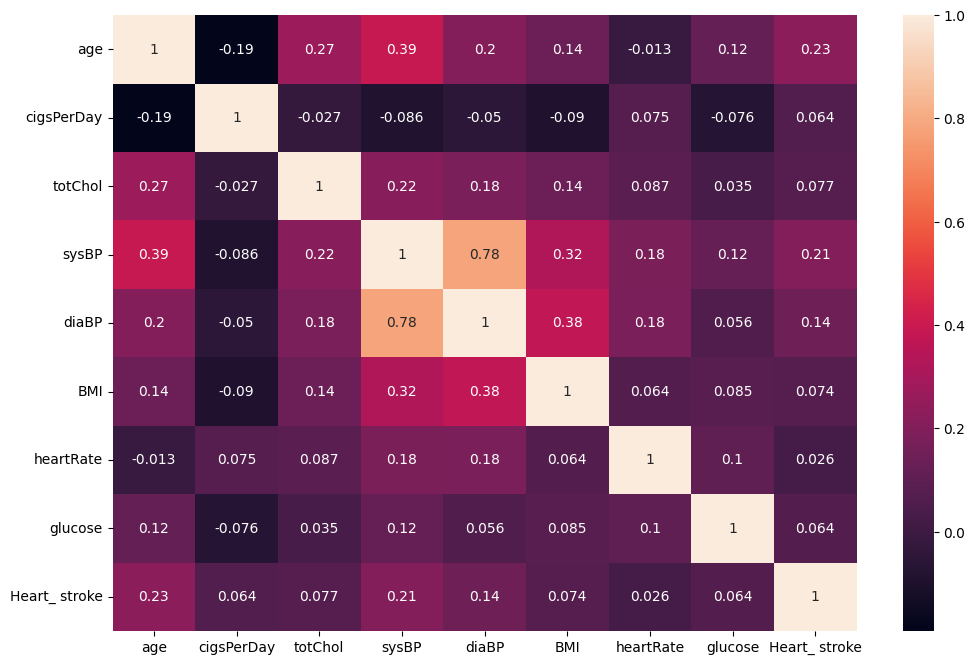

In [ ]:
sns.heatmap(corr_matrix_b,annot=True)
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_c,annot=True)
plt.show()

In [ ]:
 # Convert back to a Series


In [ ]:


# Convert correlation matrix to a long format (stacked form)
corr_pairs_b= corr_matrix_b.unstack()
corr_pairs_c= corr_matrix_c.unstack()


# Remove self-correlations (correlation of a variable with itself is always 1)
corr_pairs_b = corr_pairs_b[corr_pairs_b< 0.9].drop_duplicates()
corr_pairs_c = corr_pairs_c = corr_pairs_c.reset_index()  # Ensure it's a DataFrame
corr_pairs_c = corr_pairs_c[corr_pairs_c["level_0"] != corr_pairs_c["level_1"]]  # Remove self-correlations
corr_pairs_c = corr_pairs_c.set_index(["level_0", "level_1"])

# Sort correlations from highest to lowest
sorted_corr_b = corr_pairs_b.sort_values(ascending=False)
sorted_corr_c = corr_pairs_c.sort_values(by=0,ascending=False)


sb=sorted_corr_b.reset_index()
sb

,level_0,level_1,0
0,BPMeds,prevalentHyp,0.258366
1,prevalentHyp,Heart_ stroke,0.173064
2,BPMeds,prevalentStroke,0.115960
3,currentSmoker,prevalentHyp,0.101783
4,diabetes,Heart_ stroke,0.086953
5,BPMeds,Heart_ stroke,0.083586
6,prevalentHyp,diabetes,0.075107
7,prevalentStroke,prevalentHyp,0.062923
8,BPMeds,diabetes,0.050134
9,currentSmoker,BPMeds,0.047327


In [ ]:
sorted_corr=sorted_corr_c.reset_index().dropna(axis=0)
sorted_corr
sorted_cor=sorted_corr.set_index(["level_0", "level_1"])
sorted_cor

,,0
level_0,level_1,
sysBP,diaBP,0.782405
diaBP,sysBP,0.782405
sysBP,age,0.393354
age,sysBP,0.393354
BMI,diaBP,0.375495
...,...,...
sysBP,cigsPerDay,-0.085532
BMI,cigsPerDay,-0.090218
cigsPerDay,BMI,-0.090218


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=sorted_cor)

NameError: name 'sorted_cor' is not defined

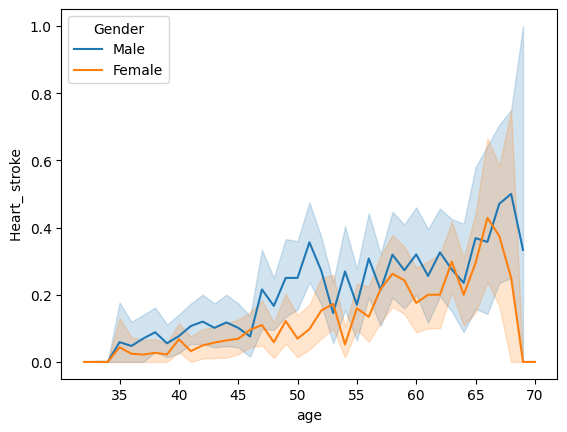

In [ ]:
sns.lineplot(x='age',y='Heart_ stroke',hue='Gender',data=hd)
plt.show()

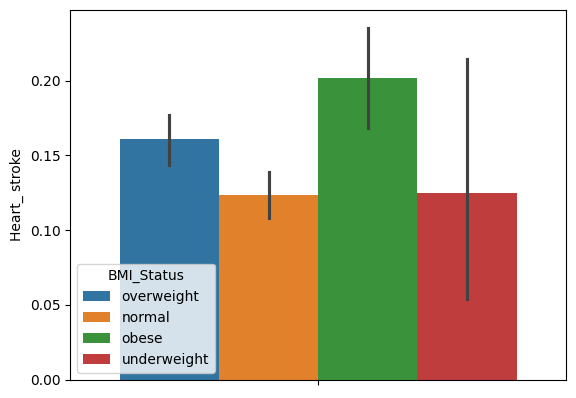

In [ ]:
sns.barplot(y='Heart_ stroke',hue='BMI_Status',data=hd)
plt.show()

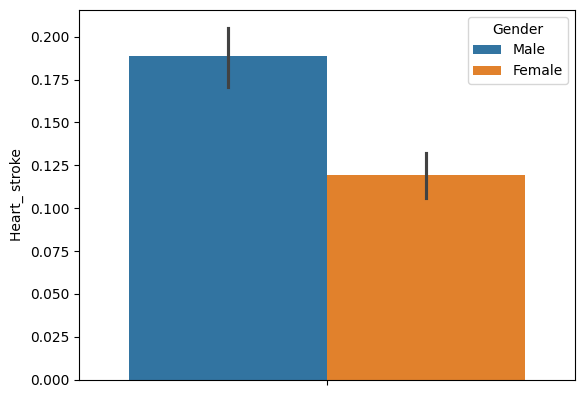

In [ ]:
sns.barplot(y='Heart_ stroke',hue='Gender',data=hd)
plt.show()

In [ ]:
hd.isna().sum()
hd['education']=hd['education'].fillna('unknown')
hd.isna().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


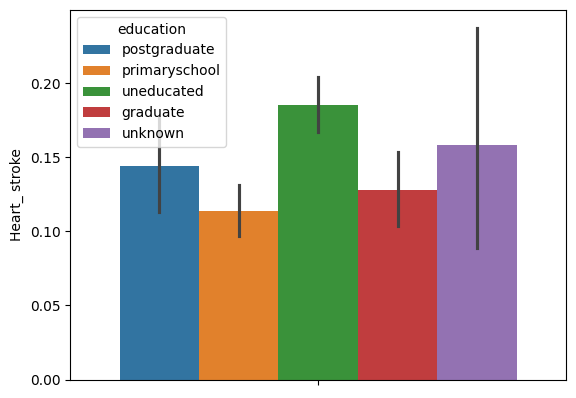

In [ ]:
sns.barplot(y='Heart_ stroke',hue='education',data=hd)
plt.show()

In [ ]:
from google.colab import files
hd.to_csv('heart_disease.csv',index=False)
files.download('heart_disease.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

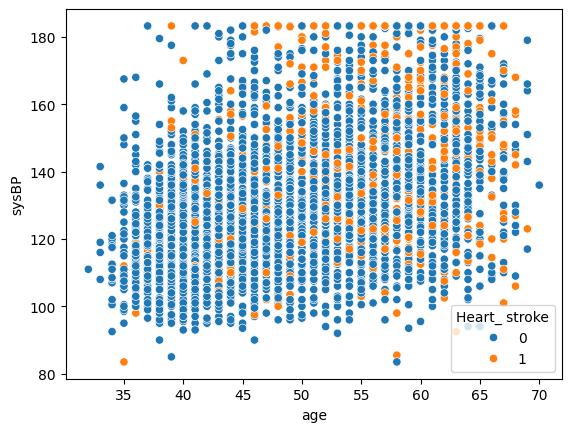

In [ ]:
sns.scatterplot(x='age',y='sysBP',hue='Heart_ stroke',data=hd, )
plt.show()

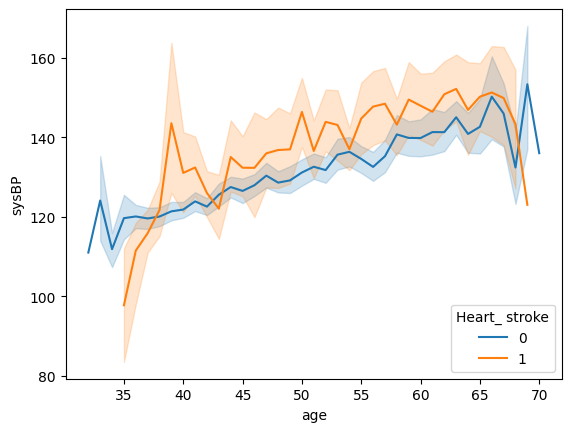

In [ ]:
sns.lineplot(x='age',y='sysBP',hue='Heart_ stroke',data=hd, )
plt.show()

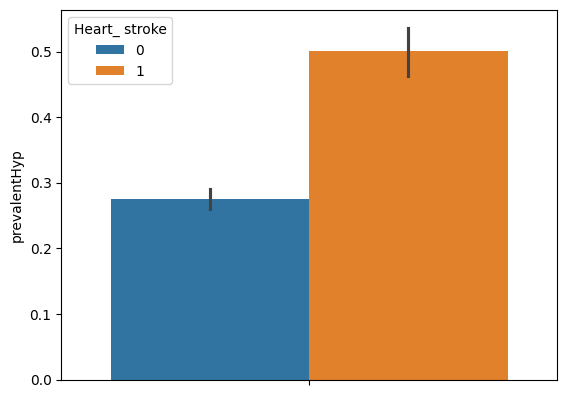

In [ ]:
sns.barplot(y='prevalentHyp',hue='Heart_ stroke',data=hd, )
plt.show()

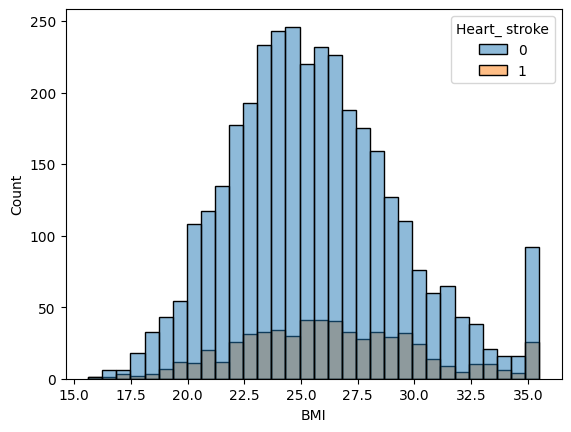

In [ ]:
sns.histplot(x='BMI',hue='Heart_ stroke',data=hd)
plt.show()

⏰

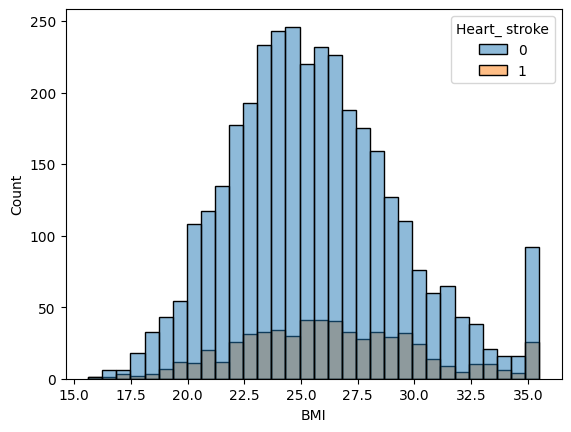

In [ ]:
sns.histplot(x='BMI', hue='Heart_ stroke', data=hd)
plt.show()

In [ ]:
hd.describe()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3749.000000,4088.000000
mean,49.504403,0.490215,8.992417,0.029354,0.005382,0.309198,0.025440,236.682241,132.224193,82.888209,25.798889,75.836106,81.883169,0.149462
std,8.541411,0.499965,11.910941,0.168818,0.073171,0.462219,0.157478,44.466740,21.906447,11.839921,4.077910,12.064789,23.888039,0.356587
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,83.000000,87.000000,0.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000
